In [1]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tree = ET.parse('brain.svg')
root = tree.getroot()

svg = list(root.findall('*'))[-1]

In [3]:
p = svg.find('{http://www.w3.org/2000/svg}path')

In [4]:
p.get('d')

'M57.3,77.2c-2.2,0.4-3.9,1.3-5,2.9c-1.8,2.6-1.2,5.9-1.2,6c0.1,0.4,0.4,0.6,0.7,0.6c0,0,0.1,0,0.1,0   c0.4-0.1,0.7-0.5,0.6-0.9c0,0-0.5-2.8,0.9-4.8c0.8-1.2,2.2-2,4-2.3c0.4-0.1,0.7-0.5,0.6-0.9C58.1,77.4,57.7,77.1,57.3,77.2z'

In [5]:
from svg.path import parse_path

In [6]:
path = parse_path(p.get('d'))

In [7]:
points = [path.point(i/100) for i in range(100)]

In [8]:
x_values = []
y_values = []

for p in list(svg.findall('{http://www.w3.org/2000/svg}path')):
    path = parse_path(p.get('d'))
    num_points = int(path.length(error=1e-6)*2)
    print(num_points)
    points = [path.point(i/num_points, error=1e-6) for i in range(num_points)]
    x_values += [point.real for point in points]
    y_values += [point.imag for point in points]

53
53
17
17
17
17
17
17
17
17
52
25
52
25
61
61
65
27
48
22
65
28
48
22
3767
312
313


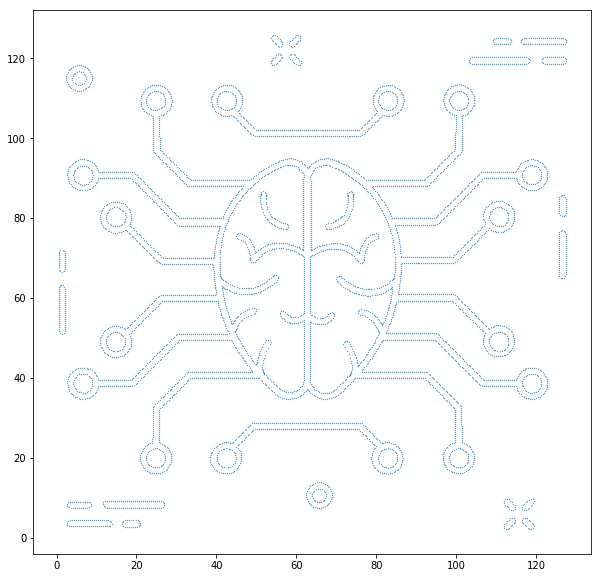

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_values, y_values, s=0.1)